In [302]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [304]:
checkpoints = r'C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [306]:
train_dir = r'G:\ML\computer vision\train'
validation_dir = r'G:\ML\computer vision\validation'
test_dir = r'G:\ML\computer vision\test'

In [310]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

In [312]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273,794 (1.04 MB)

 Trainable params: 273,794 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [356]:
model.compile(loss='catagorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [334]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=4,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(64, 64),batch_size=4,class_mode='categorical')

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [336]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [338]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=50,
                    callbacks=callbacks)

Epoch 1/50
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.4386 - loss: 0.6965
Epoch 1: val_loss improved from inf to 0.69272, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0001-loss0.69.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - acc: 0.4391 - loss: 0.6964 - val_acc: 0.5000 - val_loss: 0.6927
Epoch 2/50
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.4367 - loss: 0.6930
Epoch 2: val_loss improved from 0.69272 to 0.69087, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0002-loss0.69.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.4386 - loss: 0.6930 - val_acc: 0.5000 - val_loss: 0.6909
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.4721 - loss: 0.6908
Epoch 3: val_loss improved from 0.69087 to 0.68928, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0003-loss0.69.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.4724 - loss: 0.6908 - val_acc: 0.6000 - val_loss: 0.6893
Epoch 4/50
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.5243 - loss: 0.6908
Epoch 4: val_loss did not improve from 0.68928
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.5270 - loss: 0.6905 - val_acc: 0.5000 - val_loss: 0.6902
Epoch 5/50
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.5264 - loss: 0.6857
Epoch 5: val_loss improved from 0.68928 to 0.68317, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0005-loss0.68.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.5275 - loss: 0.6856 - val_acc: 0.6667 - val_loss: 0.6832
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.5767 - loss: 0.6755
Epoch 6: val_loss improved from 0.68317 to 0.67962, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0006-loss0.68.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.5766 - loss: 0.6755 - val_acc: 0.5167 - val_loss: 0.6796
Epoch 7/50
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.6097 - loss: 0.6762
Epoch 7: val_loss improved from 0.67962 to 0.66687, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0007-loss0.67.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.6101 - loss: 0.6757 - val_acc: 0.6000 - val_loss: 0.6669
Epoch 8/50
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.6089 - loss: 0.6508
Epoch 8: val_loss improved from 0.66687 to 0.65483, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0008-loss0.65.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.6102 - loss: 0.6510 - val_acc: 0.6833 - val_loss: 0.6548
Epoch 9/50
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.6525 - loss: 0.6423
Epoch 9: val_loss did not improve from 0.65483
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.6533 - loss: 0.6420 - val_acc: 0.5500 - val_loss: 0.6661
Epoch 10/50
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.6784 - loss: 0.6277
Epoch 10: val_loss improved from 0.65483 to 0.64224, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0010-loss0.64.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.6794 - loss: 0.6267 - val_acc: 0.6000 - val_loss: 0.6422
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.6748 - loss: 0.6172
Epoch 11: val_loss improved from 0.64224 to 0.61461, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0011-loss0.61.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.6752 - loss: 0.6169 - val_acc: 0.5667 - val_loss: 0.6146
Epoch 12/50
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.7166 - loss: 0.5747
Epoch 12: val_loss did not improve from 0.61461
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.7168 - loss: 0.5745 - val_acc: 0.6667 - val_loss: 0.6171
Epoch 13/50
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.7018 - loss: 0.5738
Epoch 13: val_loss improved from 0.61461 to 0.60388, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0013-loss0.60.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.7018 - loss: 0.5734 - val_acc: 0.6500 - val_loss: 0.6039
Epoch 14/50
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.8275 - loss: 0.4935
Epoch 14: val_loss improved from 0.60388 to 0.60006, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0014-loss0.60.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8236 - loss: 0.4954 - val_acc: 0.5667 - val_loss: 0.6001
Epoch 15/50
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.7727 - loss: 0.4948
Epoch 15: val_loss improved from 0.60006 to 0.59912, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0015-loss0.60.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.7722 - loss: 0.4949 - val_acc: 0.6000 - val_loss: 0.5991
Epoch 16/50
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.6953 - loss: 0.4995
Epoch 16: val_loss did not improve from 0.59912
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.6980 - loss: 0.4994 - val_acc: 0.6667 - val_loss: 0.6228
Epoch 17/50
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.7458 - loss: 0.5032
Epoch 17: val_loss improved from 0.59912 to 0.59358, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0017-loss0.59.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.7466 - loss: 0.5028 - val_acc: 0.6333 - val_loss: 0.5936
Epoch 18/50
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.7299 - loss: 0.4982
Epoch 18: val_loss did not improve from 0.59358
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.7311 - loss: 0.4975 - val_acc: 0.6500 - val_loss: 0.6032
Epoch 19/50
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7389 - loss: 0.4703
Epoch 19: val_loss did not improve from 0.59358
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.7397 - loss: 0.4697 - val_acc: 0.6167 - val_loss: 0.6109
Epoch 20/50
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.8253 - loss: 0.4367
Epoch 20: val_loss did not improve from 0.59358
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.8239 - loss: 0.4366 - val_acc: 0.5833 - val_loss: 0.6328
Epoch 21/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.8103 - loss: 0.4291
Epoch 21: val_loss did not improve from 0.59358
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.8101 - loss

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.7948 - loss: 0.3834 - val_acc: 0.6833 - val_loss: 0.5889
Epoch 25/50
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.8292 - loss: 0.3401
Epoch 25: val_loss did not improve from 0.58894
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8294 - loss: 0.3412 - val_acc: 0.6333 - val_loss: 0.7364
Epoch 26/50
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.8538 - loss: 0.3319
Epoch 26: val_loss improved from 0.58894 to 0.57593, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0026-loss0.58.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.8520 - loss: 0.3343 - val_acc: 0.7167 - val_loss: 0.5759
Epoch 27/50
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.8593 - loss: 0.3471
Epoch 27: val_loss did not improve from 0.57593
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.8597 - loss: 0.3470 - val_acc: 0.6667 - val_loss: 0.6022
Epoch 28/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.8831 - loss: 0.3108
Epoch 28: val_loss did not improve from 0.57593
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8826 - loss: 0.3109 - val_acc: 0.7333 - val_loss: 0.6433
Epoch 29/50
59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.8411 - loss: 0.3497
Epoch 29: val_loss did not improve from 0.57593
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.8409 - loss: 0.3496 - val_acc: 0.6833 - val_loss: 0.6490
Epoch 30/50
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.8732 - loss: 0.3031
Epoch 30: val_loss did not improve from 0.57593
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.8724 - loss

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9295 - loss: 0.2138 - val_acc: 0.7000 - val_loss: 0.5598
Epoch 42/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9277 - loss: 0.2311
Epoch 42: val_loss improved from 0.55976 to 0.55905, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0042-loss0.56.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9276 - loss: 0.2310 - val_acc: 0.7500 - val_loss: 0.5591
Epoch 43/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.8998 - loss: 0.1917
Epoch 43: val_loss improved from 0.55905 to 0.54959, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0043-loss0.55.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8998 - loss: 0.1921 - val_acc: 0.7667 - val_loss: 0.5496
Epoch 44/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9209 - loss: 0.1837
Epoch 44: val_loss did not improve from 0.54959
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9207 - loss: 0.1840 - val_acc: 0.7167 - val_loss: 0.6170
Epoch 45/50
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.9280 - loss: 0.1774
Epoch 45: val_loss did not improve from 0.54959
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9280 - loss: 0.1785 - val_acc: 0.7333 - val_loss: 0.5770
Epoch 46/50
58/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9310 - loss: 0.1721
Epoch 46: val_loss did not improve from 0.54959
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9307 - loss: 0.1733 - val_acc: 0.7667 - val_loss: 0.6737
Epoch 47/50
57/60 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9431 - loss: 0.1734
Epoch 47: val_loss did not improve from 0.54959
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9427 - loss

In [342]:
model_history.history

{'acc': [0.4541666805744171,
  0.4958333373069763,
  0.49166667461395264,
  0.5666666626930237,
  0.5458333492279053,
  0.5708333253860474,
  0.6166666746139526,
  0.6291666626930237,
  0.6666666865348816,
  0.6958333253860474,
  0.699999988079071,
  0.7250000238418579,
  0.699999988079071,
  0.7666666507720947,
  0.762499988079071,
  0.737500011920929,
  0.7708333134651184,
  0.7666666507720947,
  0.7541666626930237,
  0.7958333492279053,
  0.800000011920929,
  0.7833333611488342,
  0.800000011920929,
  0.8083333373069763,
  0.8333333134651184,
  0.8166666626930237,
  0.8708333373069763,
  0.8500000238418579,
  0.8374999761581421,
  0.862500011920929,
  0.875,
  0.862500011920929,
  0.875,
  0.8791666626930237,
  0.875,
  0.8833333253860474,
  0.8958333134651184,
  0.887499988079071,
  0.8999999761581421,
  0.8999999761581421,
  0.9208333492279053,
  0.9208333492279053,
  0.8958333134651184,
  0.9041666388511658,
  0.9291666746139526,
  0.925000011920929,
  0.9375,
  0.933333337306976

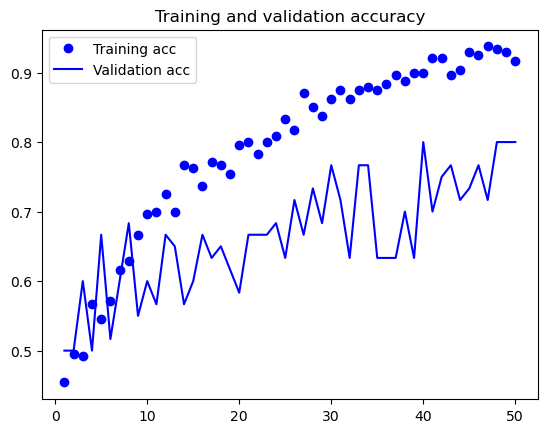

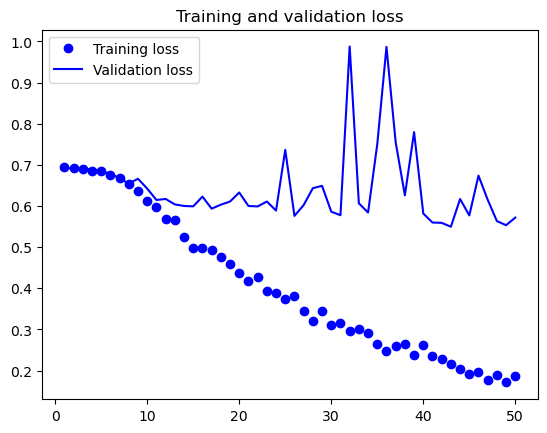

<Figure size 640x480 with 0 Axes>

In [344]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'G:\ML\computer vision\ck\model_Accuracy.png')

In [346]:
model.save(r'G:\ML\computer vision\ck\E1-cp-0012-loss0.21.h5')

Found 20 images belonging to 2 classes.


C:\Users\imran\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


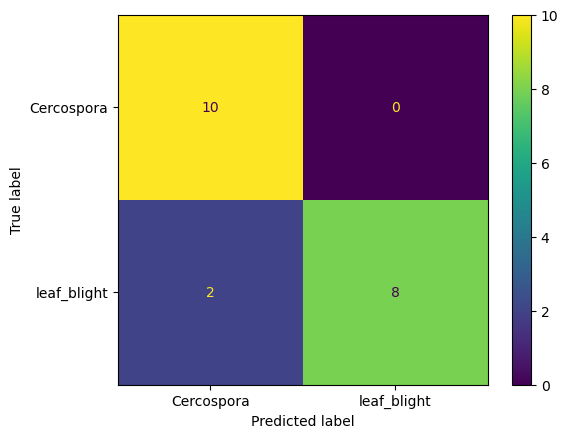

In [352]:
#model = load_model(r'G:\ML\computer vision\ck\E1-cp-0012-loss0.21.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=4, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'G:\ML\computer vision\ck\confusion_matrics.jpg')

In [354]:
print(classification_report(label, pred, target_names=['Cercospora', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.83      1.00      0.91        10
 leaf_blight       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

